In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda
import myfunc as mf

X-ray Tomography machines consist of two fundamental components: an X-ray source and a series 
of detectors. The latter includes many cells that collect the in-coming X-ray radiation that passed 
through the scanned object. In order to check the quality of the detector, the machine builder applies 
the following approach. First, the detector is divided into four distinct zones (1: upper left, 2: upper 
right, 3: bottom-left, 4: bottom-right): for each zone, a randomly chosen cell is hit by a known amount 
of X-ray radiation. The ratio between emitted and detected rays, called R, is recorded. The following 
table shows the R values collected from 15 detectors (inspected detectors are in sequential order). 

In [2]:
data_table_6 = {
    'Detector': list(range(1, 16)),
    'Zone 1': [1.19, 1.16, 0.91, 1.05, 1.00, 0.94, 1.09, 1.01, 1.00, 1.07, 1.12, 1.09, 1.21, 1.23, 1.09],
    'Zone 2': [0.96, 1.00, 1.11, 1.15, 0.97, 0.93, 0.85, 0.98, 1.16, 0.94, 1.12, 1.20, 1.25, 1.10, 1.23],
    'Zone 3': [0.81, 0.91, 0.87, 0.75, 0.83, 0.86, 1.02, 0.69, 0.73, 0.95, 0.66, 0.63, 0.90, 0.69, 0.80],
    'Zone 4': [0.64, 0.65, 0.88, 0.61, 0.75, 0.86, 0.71, 0.72, 0.72, 0.87, 0.66, 0.78, 0.80, 0.74, 0.83]
}

# Create the DataFrame
data =pd.DataFrame(data_table_6)

# Display the DataFrame
print(data)


    Detector  Zone 1  Zone 2  Zone 3  Zone 4
0          1    1.19    0.96    0.81    0.64
1          2    1.16    1.00    0.91    0.65
2          3    0.91    1.11    0.87    0.88
3          4    1.05    1.15    0.75    0.61
4          5    1.00    0.97    0.83    0.75
5          6    0.94    0.93    0.86    0.86
6          7    1.09    0.85    1.02    0.71
7          8    1.01    0.98    0.69    0.72
8          9    1.00    1.16    0.73    0.72
9         10    1.07    0.94    0.95    0.87
10        11    1.12    1.12    0.66    0.66
11        12    1.09    1.20    0.63    0.78
12        13    1.21    1.25    0.90    0.80
13        14    1.23    1.10    0.69    0.74
14        15    1.09    1.23    0.80    0.83


 Design a traditional control chart to monitor the R descriptor in the n=4 considered zones. 
Which problems arise by using this approach? Without using the information about the cell 
position within the detector, which approach do you suggest to use in order to avoid the 
problems observed by applying the traditional chart? 

In [4]:
data.drop(columns=['Detector'], inplace=True)

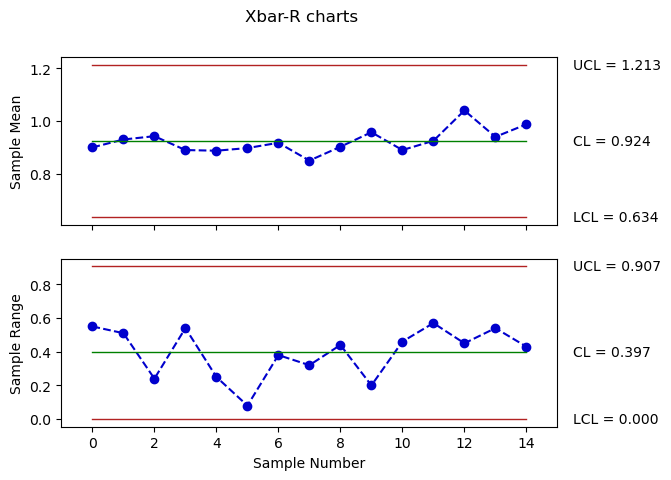

In [5]:
data_XBARR=qda.ControlCharts.XbarR(data)

In [ ]:
#the problem arising is that we could see the phenomena of the hugging in the xbar chart, that is all the sample
#means are very near to the CL of the control chart.
#as a matter of fact we even didn't check the NID assumption in our data

p-value of the Shapiro-Wilk test: 0.06362


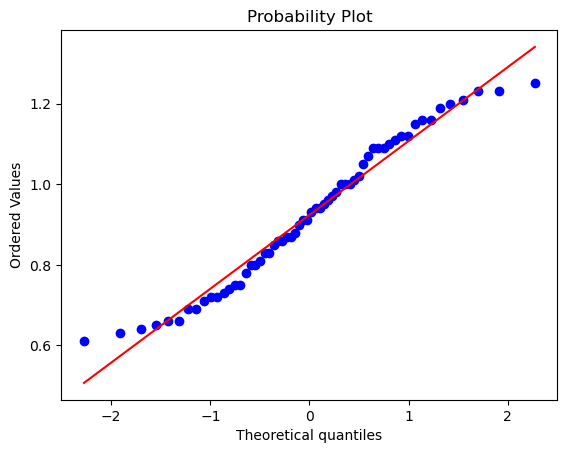

Accept H0: the data are normal


In [6]:
mf.shapiroqq(data,0.05,'yes')

#normality is very borderline: p_value=0.06

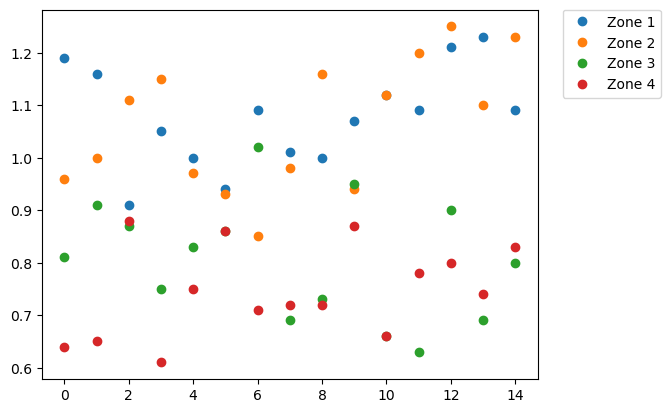

In [7]:
mf.dotplot(data)
#we cannot use the runs test but from this plot is clear that different zone show different pattern
#we cannot assume the NID of the data in a situation like this!

#first solution: I-MR-R control chart:
L’unico veramente da scartare è l’Xbar chart, mentre 
1) Individual Chart dell’IMR permette di monitorare la media del processo trattando le medie del campione come osservazioni individuali; 
2) il chart MR consente di monitorare la variabilità tra campioni; 
3) il chart R dell’Xbar-R CC consente di monitorare la variabilità all'interno del campione.



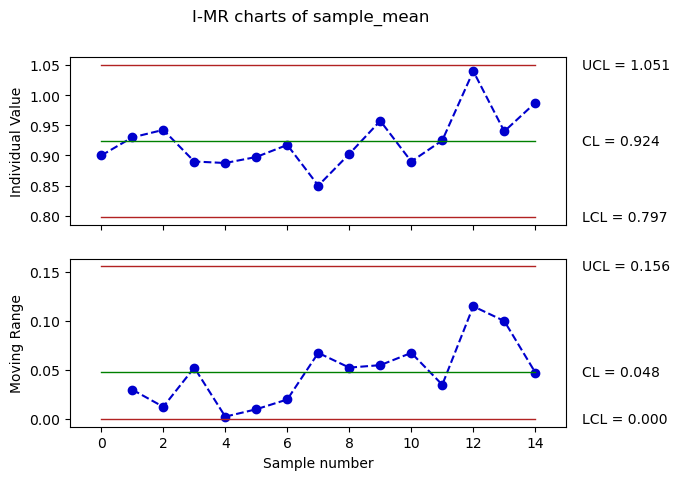

In [8]:
data_IMR_on_means = qda.ControlCharts.IMR(data_XBARR, 'sample_mean') 
#For sure this option is more suitable, even if we can see a strange pattern in the Indivdual chart
#and in the MR chart as well (after sample 6 almost all MR are above the CL) 

Design a control chart that includes, if necessary, the information about the cell position 
within the detector. How do the results change with respect to point a)?

In [9]:
data_stack=data.stack()

In [10]:
data_stack.values

array([1.19, 0.96, 0.81, 0.64, 1.16, 1.  , 0.91, 0.65, 0.91, 1.11, 0.87,
       0.88, 1.05, 1.15, 0.75, 0.61, 1.  , 0.97, 0.83, 0.75, 0.94, 0.93,
       0.86, 0.86, 1.09, 0.85, 1.02, 0.71, 1.01, 0.98, 0.69, 0.72, 1.  ,
       1.16, 0.73, 0.72, 1.07, 0.94, 0.95, 0.87, 1.12, 1.12, 0.66, 0.66,
       1.09, 1.2 , 0.63, 0.78, 1.21, 1.25, 0.9 , 0.8 , 1.23, 1.1 , 0.69,
       0.74, 1.09, 1.23, 0.8 , 0.83])

Number of points n = 60
Mean = 0.92


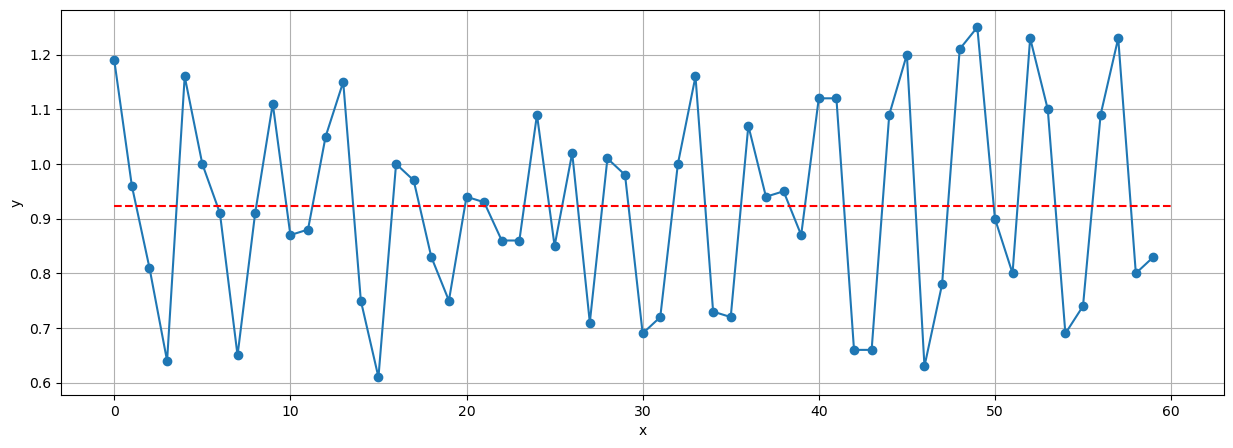

In [13]:
data_new=pd.DataFrame({'x':data_stack.values})
data_new['z'] = np.tile(np.arange(1, 5), int(len(data_new)/4)) 
mf.single_ts_plot(data_new['x'])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


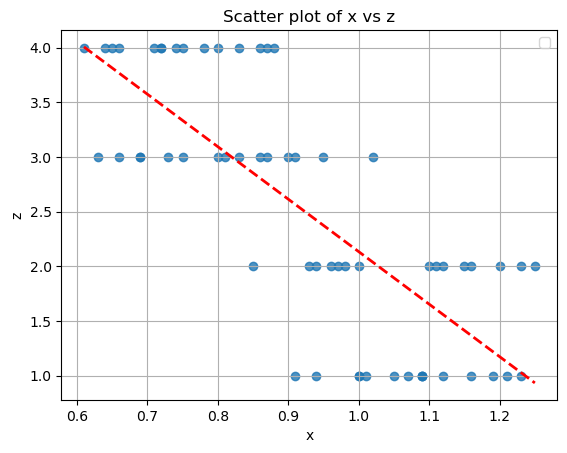

In [15]:
mf.scatter_plot_nice_h(data_new,'x','z')


In [23]:
data_new['Dummy1'] = np.where(data_new['z'].isin([1,2]), 1, 0)
data_new['Dummy2'] = np.where(data_new['z'].isin([3,4]), 1, 0)


In [24]:
import statsmodels.api as sm
import qda
x = data_new[['Dummy1', 'Dummy2']] #se solo un regressore togli le doppie quadre e metti singole
x = sm.add_constant(x) 
y = data_new['x']
model = sm.OLS(y, x).fit()
qda.summary(model)


REGRESSION EQUATION
-------------------
x =  + 0.616 const + 0.454 Dummy1 + 0.161 Dummy2

COEFFICIENTS
------------
  Term   Coef  SE Coef  T-Value    P-Value
 const 0.6159   0.0092  67.2725 9.6711e-57
Dummy1 0.4544   0.0145  31.3940 4.2905e-38
Dummy2 0.1614   0.0145  11.1529 4.6634e-16

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.1073 0.6624     0.6566

ANALYSIS OF VARIANCE
---------------------
    Source   DF  Adj SS  Adj MS   F-Value    P-Value
Regression  1.0  1.2877  1.2877  113.8055 2.6762e-15
     const  1.0 51.2081 51.2081 4525.5892 9.6711e-57
    Dummy1  1.0 11.1521 11.1521  985.5802 4.2905e-38
    Dummy2  1.0  1.4075  1.4075  124.3875 4.6634e-16
     Error 58.0  0.6563  0.0113       NaN        NaN
     Total 59.0  1.9440     NaN       NaN        NaN


Shapiro-Wilk test p-value on the residuals = 0.38501


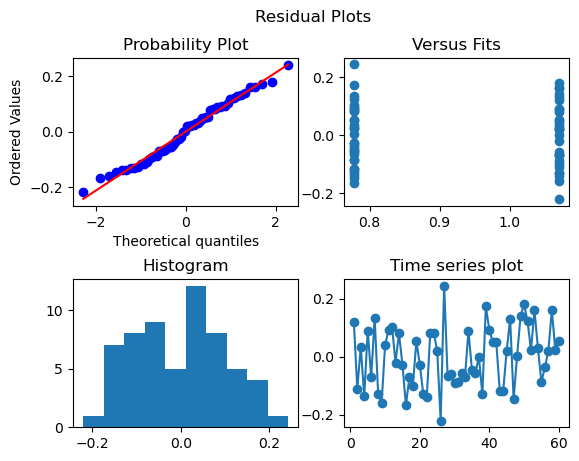

In [25]:
mf.shapirplusresplots(model)

Runs test statistic = -1.034
Runs test p-value = 0.30107
Accept H0: the data are random


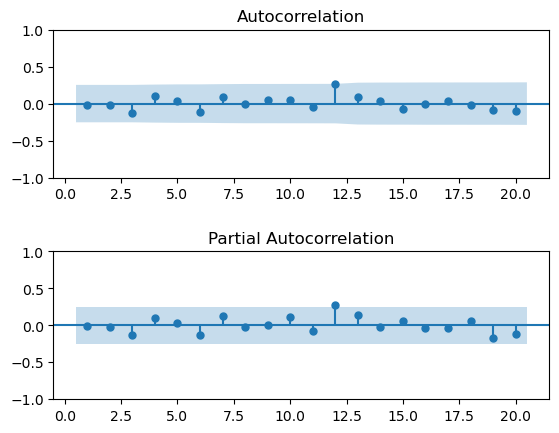

In [26]:
mf.runs(model.resid)
mf.acfpacf(model.resid)

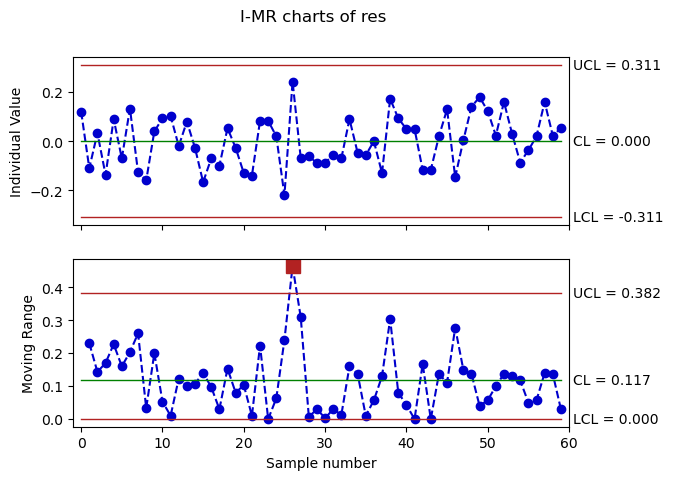

In [27]:
df_SCC = pd.DataFrame({'res': model.resid}) #lo chiamo direttamente df_SCC
df_SCC = qda.ControlCharts.IMR(df_SCC, 'res')
